<a href="https://colab.research.google.com/github/CodeHunterOfficial/TimeSeriesForecast_2024-2025/blob/main/%D0%A2%D0%B5%D0%BC%D0%B0%208.%20%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5%20%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85%20%D1%80%D1%8F%D0%B4%D0%BE%D0%B2%20%D1%81%20%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E%20RNN/%D0%A2%D0%B5%D0%BC%D0%B0_8_%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B2%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D1%85_%D1%80%D1%8F%D0%B4%D0%BE%D0%B2_%D1%81_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E_RNN_(%D0%9F%D1%80%D0%B8%D0%BC%D0%B5%D1%80%D1%8B).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Тема 8. Прогнозирование временных рядов с помощью RNN

### Применение RNN в задачах прогнозирования временных рядов

#### Введение

Рекуррентные нейронные сети (RNN) представляют собой мощный класс моделей, способных работать с последовательными данными, такими как временные ряды. В данной лекции мы рассмотрим применение RNN для прогнозирования временных рядов, включая алгоритмы прямого и обратного распространения, функции активации, функции потерь, метрики оценки качества модели и конкретные числовые примеры.

#### Основы RNN

Рекуррентные нейронные сети (RNN) обладают способностью учитывать зависимости во времени, что делает их идеальным выбором для работы с временными рядами. Основная идея RNN заключается в передаче информации о предыдущих состояниях через время.

##### Структура RNN

Для временного ряда $ \{x_t\} $, где $ t = 1, 2, \ldots, T $:

1. **Обновление скрытого состояния:**
$$ h_t = \sigma(W_h \cdot x_t + U_h \cdot h_{t-1} + b_h) $$
где:
   - $ h_t $ - скрытое состояние в момент времени $ t $,
   - $ \sigma $ - функция активации, обычно tanh или ReLU,
   - $ W_h $ - матрица весов для входа,
   - $ U_h $ - матрица весов для предыдущего скрытого состояния,
   - $ b_h $ - вектор смещения.

2. **Выходной слой:**
$$ \hat{y}_t = \phi(W_y \cdot h_t + b_y) $$
где:
   - $ \hat{y}_t $ - прогнозируемое значение в момент времени $ t $,
   - $ W_y $ - матрица весов для выходного слоя,
   - $ b_y $ - вектор смещения,
   - $ \phi $ - функция активации выходного слоя, которая может быть различной в зависимости от задачи (например, softmax для классификации или линейная функция для регрессии).

#### Прямое распространение (Forward Pass)

Процесс прямого распространения в RNN заключается в последовательном вычислении скрытых состояний $ h_t $ и выходов $ \hat{y}_t $ для всех моментов времени $ t $.

1. **Начальное скрытое состояние:**
   $$ h_0 = 0 $$
   Обычно инициализируется нулями.

2. **Вычисление для каждого временного шага:**
   Для каждого $ t = 1, 2, \ldots, T $:
   $$ h_t = \sigma(W_h \cdot x_t + U_h \cdot h_{t-1} + b_h) $$
   $$ \hat{y}_t = \phi(W_y \cdot h_t + b_y) $$

#### Обратное распространение (Backward Pass)

Обратное распространение ошибки (Backpropagation Through Time, BPTT) применяется для обновления весов на основе вычисленной ошибки.

1. **Функция потерь:**
   Выбирается в зависимости от задачи. Например, среднеквадратичная ошибка (MSE) для регрессии:
   $$ L = \frac{1}{T} \sum_{t=1}^T (\hat{y}_t - y_t)^2 $$

2. **Обновление весов:**
   Используется градиентный спуск для обновления весов $ W_h $, $ U_h $, $ b_h $, $ W_y $ и $ b_y $. Для этого вычисляются градиенты функции потерь по весам.

##### Обновление весов (Gradient Descent)

Обновление весов происходит на основе вычисленных градиентов. Пусть $ \eta $ - скорость обучения, тогда обновление весов выглядит следующим образом:

1. **Обновление весов $ W_h $:**
   $$ W_h \leftarrow W_h - \eta \frac{\partial L}{\partial W_h} $$

2. **Обновление весов $ U_h $:**
   $$ U_h \leftarrow U_h - \eta \frac{\partial L}{\partial U_h} $$

3. **Обновление смещений $ b_h $:**
   $$ b_h \leftarrow b_h - \eta \frac{\partial L}{\partial b_h} $$

4. **Обновление весов $ W_y $:**
   $$ W_y \leftarrow W_y - \eta \frac{\partial L}{\partial W_y} $$

5. **Обновление смещений $ b_y $:**
   $$ b_y \leftarrow b_y - \eta \frac{\partial L}{\partial b_y} $$

##### Вычисление градиентов (Gradient Calculation)

Градиенты вычисляются с помощью метода обратного распространения ошибки через время (Backpropagation Through Time, BPTT):

1. **Градиенты для выходного слоя:**
   $$ \frac{\partial L}{\partial W_y} = \sum_{t=1}^T \frac{\partial L}{\partial \hat{y}_t} \frac{\partial \hat{y}_t}{\partial W_y} $$
   $$ \frac{\partial L}{\partial b_y} = \sum_{t=1}^T \frac{\partial L}{\partial \hat{y}_t} $$

2. **Градиенты для скрытых состояний:**
   $$ \delta_t = \frac{\partial L}{\partial \hat{y}_t} \frac{\partial \hat{y}_t}{\partial h_t} + \delta_{t+1} \frac{\partial h_{t+1}}{\partial h_t} $$
   где $ \delta_t $ - ошибка на шаге $ t $, передаваемая назад во времени.

3. **Градиенты для весов $ W_h $:**
   $$ \frac{\partial L}{\partial W_h} = \sum_{t=1}^T \delta_t \frac{\partial h_t}{\partial W_h} $$

4. **Градиенты для весов $ U_h $:**
   $$ \frac{\partial L}{\partial U_h} = \sum_{t=1}^T \delta_t \frac{\partial h_t}{\partial U_h} $$

5. **Градиенты для смещений $ b_h $:**
   $$ \frac{\partial L}{\partial b_h} = \sum_{t=1}^T \delta_t \frac{\partial h_t}{\partial b_h} $$

Где:
- $\frac{\partial h_t}{\partial W_h} = x_t \cdot \sigma'(W_h \cdot x_t + U_h \cdot h_{t-1} + b_h)$
- $\frac{\partial h_t}{\partial U_h} = h_{t-1} \cdot \sigma'(W_h \cdot x_t + U_h \cdot h_{t-1} + b_h)$
- $\frac{\partial h_t}{\partial b_h} = \sigma'(W_h \cdot x_t + U_h \cdot h_{t-1} + b_h)$

6. **Градиенты для весов $ U_h $:**
   $$ \frac{\partial L}{\partial U_h} = \sum_{t=1}^T \delta_t \frac{\partial h_t}{\partial U_h} = \sum_{t=1}^T \delta_t \cdot h_{t-1} \cdot \sigma'(W_h \cdot x_t + U_h \cdot h_{t-1} + b_h) $$

7. **Градиенты для смещений $ b_y $:**
   $$ \frac{\partial L}{\partial b_y} = \sum_{t=1}^T \frac{\partial L}{\partial \hat{y}_t} $$

#### Проблемы обучения RNN
RNN имеют сложности с обучением из-за проблем исчезающих и взрывающихся градиентов, особенно при обработке длинных последовательностей. Эти проблемы затрудняют обновление весов и ухудшают производительность модели. Для решения этих проблем разработаны специальные архитектуры, такие как LSTM и GRU.

### Заключение

Рекуррентные нейронные сети представляют собой мощный инструмент для анализа и прогнозирования временных рядов благодаря их способности учитывать последовательные зависимости. В следующих разделах мы рассмотрим конкретные примеры применения RNN для различных типов временных рядов и методы оценки качества моделей.



## Пример прогнозирования временного ряда с использованием RNN
Допустим, у нас есть временной ряд $ \{1, 2, 3, 4, 5\} $, и мы используем простую RNN с функцией активации $ \tanh $.

Параметры модели:
- $ W_h = 0.5 $
- $ U_h = 0.5 $
- $ b_h = 0 $
- $ W_y = 1 $
- $ b_y = 0 $

Инициализация: $ h_0 = 0 $.

### Прямое распространение

1. **Шаг 1:**
   $$
   h_1 = \tanh(0.5 \cdot 1 + 0.5 \cdot 0) = \tanh(0.5) = 0.4621
   $$
   $$
   \hat{y}_1 = 1 \cdot 0.4621 + 0 = 0.4621
   $$

2. **Шаг 2:**
   $$
   h_2 = \tanh(0.5 \cdot 2 + 0.5 \cdot 0.4621) = \tanh(1.23105) = 0.8437
   $$
   $$
   \hat{y}_2 = 1 \cdot 0.8437 + 0 = 0.8437
   $$

3. **Шаг 3:**
   $$
   h_3 = \tanh(0.5 \cdot 3 + 0.5 \cdot 0.8437) = \tanh(1.92185) = 0.9574
   $$
   $$
   \hat{y}_3 = 1 \cdot 0.9574 + 0 = 0.9574
   $$

4. **Шаг 4:**
   $$
   h_4 = \tanh(0.5 \cdot 4 + 0.5 \cdot 0.9574) = \tanh(2.4787) = 0.9863
   $$
   $$
   \hat{y}_4 = 1 \cdot 0.9863 + 0 = 0.9863
   $$

5. **Шаг 5:**
   $$
   h_5 = \tanh(0.5 \cdot 5 + 0.5 \cdot 0.9863) = \tanh(2.99315) = 0.9950
   $$
   $$
   \hat{y}_5 = 1 \cdot 0.9950 + 0 = 0.9950
   $$

### Обратное распространение (Backpropagation Through Time, BPTT)

После получения прогнозов $ \hat{y}_t $ для всех моментов времени $ t $, необходимо вычислить градиенты и обновить параметры модели.

#### Вычисление градиентов

1. **Градиент функции потерь по выходам $ \hat{y}_t $:**

   Предположим, что фактические значения временного ряда $ y_t = \{1, 2, 3, 4, 5\} $.

   Для каждого момента времени $ t $:
   $$
   \frac{\partial L}{\partial \hat{y}_t} = 2 (\hat{y}_t - y_t)
   $$

   Рассчитаем для каждого $ \hat{y}_t $:
   - $ \frac{\partial L}{\partial \hat{y}_1} = 2 (0.4621 - 1) = -1.0758 $
   - $ \frac{\partial L}{\partial \hat{y}_2} = 2 (0.8437 - 2) = -2.3126 $
   - $ \frac{\partial L}{\partial \hat{y}_3} = 2 (0.9574 - 3) = -4.0852 $
   - $ \frac{\partial L}{\partial \hat{y}_4} = 2 (0.9863 - 4) = -7.0274 $
   - $ \frac{\partial L}{\partial \hat{y}_5} = 2 (0.9950 - 5) = -9.0100 $

2. **Градиенты по скрытым состояниям $ \delta h_t $:**

   Для последнего временного шага $ T = 5 $:
   $$
   \delta h_5 = \frac{\partial L}{\partial \hat{y}_5} \cdot \frac{\partial \hat{y}_5}{\partial h_5}
   $$
   $$
   \frac{\partial \hat{y}_5}{\partial h_5} = W_y = 1
   $$
   $$
   \delta h_5 = -9.0100 \cdot 1 = -9.0100
   $$

   Для предыдущих временных шагов $ t $, используя рекуррентное соотношение:
   $$
   \delta h_t = \frac{\partial L}{\partial \hat{y}_t} \cdot W_y + \delta h_{t+1} \cdot \tanh'(W_h \cdot x_{t+1} + U_h \cdot h_t + b_h) \cdot U_h
   $$

   Рассчитаем для каждого $ t $:
   - $ \delta h_4 = -7.0274 \cdot 1 + (-9.0100) \cdot \tanh'(0.5 \cdot 5 + 0.5 \cdot 0.9863 + 0) \cdot 0.5 $
   - $ \delta h_3 = -4.0852 \cdot 1 + \delta h_4 \cdot \tanh'(0.5 \cdot 4 + 0.5 \cdot 0.9863 + 0) \cdot 0.5 $
   - $ \delta h_2 = -2.3126 \cdot 1 + \delta h_3 \cdot \tanh'(0.5 \cdot 3 + 0.5 \cdot 0.8437 + 0) \cdot 0.5 $
   - $ \delta h_1 = -1.0758 \cdot 1 + \delta h_2 \cdot \tanh'(0.5 \cdot 2 + 0.5 \cdot 0.4621 + 0) \cdot 0.5 $

3. **Градиенты по параметрам $ W_h, U_h, b_h $:**

   Используя вычисленные $ \delta h_t $, вычислим градиенты по параметрам:
   $$
   \frac{\partial L}{\partial W_h} = \sum_{t=1}^{5} \delta h_t \cdot \frac{\partial h_t}{\partial W_h}
   $$
   $$
   \frac{\partial L}{\partial U_h} = \sum_{t=1}^{5} \delta h_t \cdot \frac{\partial h_t}{\partial U_h}
   $$
   $$
   \frac{\partial L}{\partial b_h} = \sum_{t=1}^{5} \delta h_t \cdot \frac{\partial h_t}{\partial b_h}
   $$

   Где
   $$
   \frac{\partial h_t}{\partial W_h} = \tanh'(W_h \cdot x_t + U_h \cdot h_{t-1} + b_h) \cdot x_t
   $$
   $$
   \frac{\partial h_t}{\partial U_h} = \tanh'(W_h \cdot x_t + U_h \cdot h_{t-1} + b_h) \cdot h_{t-1}
   $$
   $$
   \frac{\partial h_t}{\partial b_h} = \tanh'(W_h \cdot x_t + U_h \cdot h_{t-1} + b_h)
   $$

   где $ \tanh'(x) = 1 - \tanh^2(x) $.

Эти градиенты используются для обновления параметров модели в процессе обучения, например, с помощью градиентного спуска.

Таким образом, BPTT позволяет эффективно обучать RNN, учитывая временные зависимости и минимизируя ошибку прогнозирования временных рядов.


**Пример**

Epoch 1/50
50/50 [==============================] - 2s 9ms/step - loss: 2.4038 - val_loss: 0.8302
Epoch 2/50
50/50 [==============================] - 0s 6ms/step - loss: 0.3399 - val_loss: 0.1010
Epoch 3/50
50/50 [==============================] - 0s 5ms/step - loss: 0.0703 - val_loss: 0.0549
Epoch 4/50
50/50 [==============================] - 0s 5ms/step - loss: 0.0494 - val_loss: 0.0419
Epoch 5/50
50/50 [==============================] - 0s 4ms/step - loss: 0.0376 - val_loss: 0.0318
Epoch 6/50
50/50 [==============================] - 0s 6ms/step - loss: 0.0293 - val_loss: 0.0249
Epoch 7/50
50/50 [==============================] - 0s 5ms/step - loss: 0.0233 - val_loss: 0.0200
Epoch 8/50
50/50 [==============================] - 0s 6ms/step - loss: 0.0185 - val_loss: 0.0161
Epoch 9/50
50/50 [==============================] - 0s 6ms/step - loss: 0.0150 - val_loss: 0.0131
Epoch 10/50
50/50 [==============================] - 0s 5ms/step - loss: 0.0123 - val_loss: 0.0112
Epoch 11/50
50/50 [

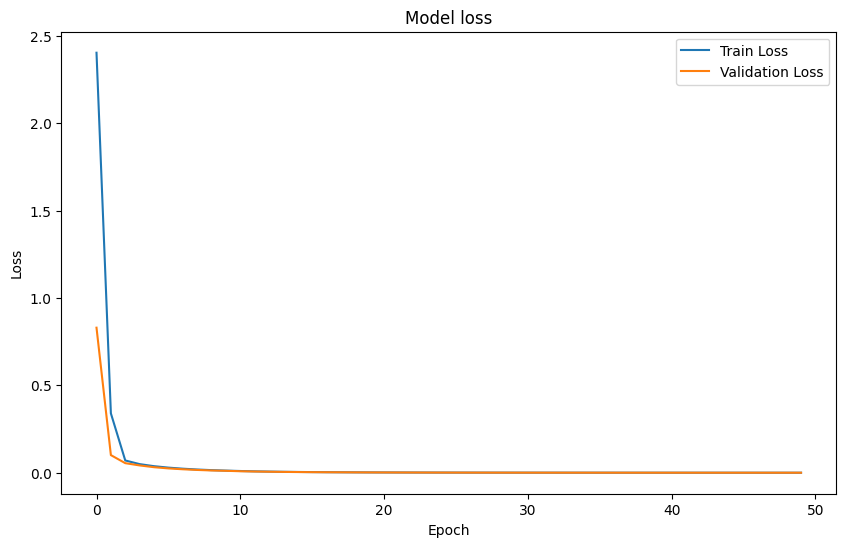

7/7 [==============================] - 0s 3ms/step
MSE: 0.00019106035980914732, MAE: 0.01188060325935109


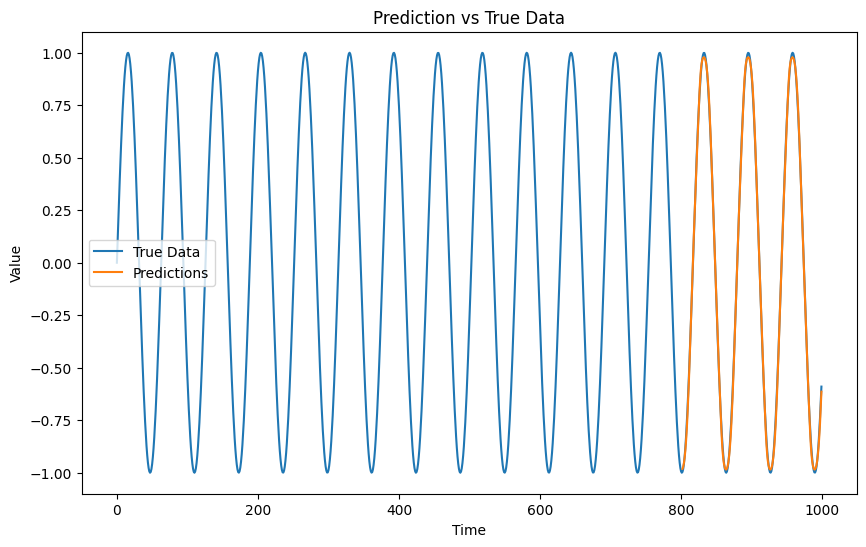

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Генерируем синусоидальный временной ряд
T = 1000
t = np.arange(0, T)
x = np.sin(0.1 * t)

# Формируем данные для обучения: предыдущие значения временного ряда и текущее
X = np.array([x[i:i+10] for i in range(T-10)])
y = x[10:]

# Разделяем на обучающую и тестовую выборки
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Создаем модель RNN
model = Sequential([
    SimpleRNN(10, input_shape=(10, 1)),
    Dense(1)
])

# Компилируем модель с функцией потерь MSE и оптимизатором Adam
model.compile(optimizer='adam', loss='mean_squared_error')

# Обучаем модель и сохраняем историю обучения
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# График обучения
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Делаем прогнозы на тестовой выборке
y_pred = model.predict(X_test)

# Вычисляем метрики
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'MSE: {mse}, MAE: {mae}')

# График прогнозирования
plt.figure(figsize=(10, 6))
plt.plot(t, x, label='True Data')
plt.plot(t[split+10:], y_pred, label='Predictions')
plt.title('Prediction vs True Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

### Применение LSTM в задачах прогнозирования временных рядов

#### Введение

Долгая краткосрочная память (LSTM, Long Short-Term Memory) — это особый тип рекуррентных нейронных сетей, который способен эффективно учитывать долгосрочные зависимости в последовательных данных, таких как временные ряды. В данной лекции мы изучим структуру LSTM, процессы прямого и обратного распространения, функции активации, функции потерь, метрики оценки качества модели и приведем конкретные числовые примеры.

#### Основы LSTM

Долгая краткосрочная память (LSTM) — это специализированная архитектура рекуррентных нейронных сетей, которая хорошо подходит для работы с временными рядами благодаря своей способности к запоминанию долгосрочных зависимостей и предотвращению проблемы затухающего градиента.

##### Структура LSTM

LSTM состоит из нескольких ключевых компонентов:
- **Шлюзовые управляющие элементы (Gates)**: помогают регулировать поток информации внутри ячейки LSTM.
- **Клеточное состояние (Cell State)**: хранит информацию о зависимостях между моментами времени.

##### Основные компоненты LSTM

Для временного ряда $ \{x_t\} $, где $ t = 1, 2, \ldots, T $:

1. **Забывающий шлюз (Forget Gate)**:
$$ f_t = \sigma(W_f \cdot x_t + U_f \cdot h_{t-1} + b_f) $$
где:
   - $ f_t $ - вектор забывания,
   - $ W_f $, $ U_f $, $ b_f $ - веса и смещение для забывающего шлюза.

2. **Входной шлюз (Input Gate)**:
$$ i_t = \sigma(W_i \cdot x_t + U_i \cdot h_{t-1} + b_i) $$
$$ \tilde{C}_t = \tanh(W_C \cdot x_t + U_C \cdot h_{t-1} + b_C) $$
где:
   - $ i_t $ - вектор входа,
   - $ \tilde{C}_t $ - новая информация, которую мы можем добавить в клеточное состояние,
   - $ W_i, U_i, b_i $ и $ W_C, U_C, b_C $ - соответствующие веса и смещения.

3. **Обновление клеточного состояния (Cell State Update)**:
$$ C_t = f_t \cdot C_{t-1} + i_t \cdot \tilde{C}_t $$
где:
   - $ C_t $ - обновленное клеточное состояние,
   - $ C_{t-1} $ - предыдущее клеточное состояние.

4. **Выходной шлюз (Output Gate)**:
$$ o_t = \sigma(W_o \cdot x_t + U_o \cdot h_{t-1} + b_o) $$
$$ h_t = o_t \cdot \tanh(C_t) $$
где:
   - $ o_t $ - вектор выхода,
   - $ h_t $ - скрытое состояние на момент времени $ t $.

#### Прямое распространение (Forward Pass) в LSTM

Процесс прямого распространения в LSTM включает в себя последовательное вычисление клеточного состояния $ C_t $, скрытого состояния $ h_t $ и выхода $ \hat{y}_t $ для всех моментов времени $ t $.

##### Пример прямого распространения

Предположим, что у нас есть временной ряд $ \{1, 2, 3, 4, 5\} $ и мы используем LSTM с функцией активации $ \tanh $ для всех внутренних слоев.

Параметры модели:
- $ W_f, U_f, b_f $, $ W_i, U_i, b_i $, $ W_C, U_C, b_C $, $ W_o, U_o, b_o $ - матрицы весов и векторы смещения.

Инициализация:
- $ C_0 = h_0 = 0 $.

1. **Шаг 1:**
   Вычисляем $ f_1, i_1, \tilde{C}_1, C_1, o_1, h_1 $.

2. **Шаг 2:**
   Вычисляем $ f_2, i_2, \tilde{C}_2, C_2, o_2, h_2 $.

3. **Шаг 3:**
   Вычисляем $ f_3, i_3, \tilde{C}_3, C_3, o_3, h_3 $.

4. **Шаг 4:**
   Вычисляем $ f_4, i_4, \tilde{C}_4, C_4, o_4, h_4 $.

5. **Шаг 5:**
   Вычисляем $ f_5, i_5, \tilde{C}_5, C_5, o_5, h_5 $.

#### Обратное распространение (Backpropagation Through Time, BPTT) в LSTM

Обучение LSTM включает в себя обратное распространение через время (BPTT), которое позволяет распространять градиенты ошибки на все временные шаги.

##### Вычисление градиентов

1. **Градиент функции потерь по выходам:**
   $$ \frac{\partial L}{\partial \hat{y}_t} $$

2. **Градиенты по скрытым состояниям:**
   $$ \delta h_t = \frac{\partial L}{\partial h_t} + \delta h_{t+1} \cdot \frac{\partial h_{t+1}}{\partial h_t} $$
   где:
   $$ \delta h_t = \frac{\partial L}{\partial \hat{y}_t} \cdot \frac{\partial \hat{y}_t}{\partial h_t} $$
   $$ \delta h_{t+1} = \delta h_t \cdot \frac{\partial h_t}{\partial h_{t+1}} $$

3. **Градиенты по клеточному состоянию:**
   $$ \delta C_t = \delta h_t \cdot \frac{\partial h_t}{\partial C_t} + \delta C_{t+1} \cdot \frac{\partial C_{t+1}}{\partial C_t} $$
   где:
   $$ \delta C_t = \delta h_t \cdot o_t \cdot (1 - \tanh^2(C_t)) + \delta C_{t+1} \cdot f_{t+1} $$

4. **Градиенты по параметрам LSTM:**
   $$ \frac{\partial L}{\partial W_f}, \frac{\partial L}{\partial U_f}, \frac{\partial L}{\partial b_f}, \ldots $$

#### Функции активации

Функции активации в LSTM обычно включают:
- **sigmoid:** $ \sigma(x) = \frac{1}{1 + e^{-x}} $
- **tanh:** $ \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} $

#### Функции потерь

Функции потерь для обучения LSTM включают:
- **Mean Squared Error (MSE):**
$$ \text{MSE

} = \frac{1}{T} \sum_{t=1}^{T} (\hat{y}_t - y_t)^2 $$

- **Mean Absolute Error (MAE):**
$$ \text{MAE} = \frac{1}{T} \sum_{t=1}^{T} |\hat{y}_t - y_t| $$

#### Метрики оценки модели

Метрики оценки качества модели LSTM включают:
- **Root Mean Squared Error (RMSE):**
$$ \text{RMSE} = \sqrt{\frac{1}{T} \sum_{t=1}^{T} (\hat{y}_t - y_t)^2} $$

- **Mean Absolute Percentage Error (MAPE):**
$$ \text{MAPE} = \frac{1}{T} \sum_{t=1}^{T} \left| \frac{\hat{y}_t - y_t}{y_t} \right| \times 100 \% $$

#### Пример прогнозирования временного ряда с использованием LSTM

Давайте рассмотрим пример использования LSTM для прогнозирования временного ряда на Python:


Epoch 1/50
50/50 [==============================] - 3s 17ms/step - loss: 0.3174 - val_loss: 0.1790
Epoch 2/50
50/50 [==============================] - 0s 7ms/step - loss: 0.1144 - val_loss: 0.0840
Epoch 3/50
50/50 [==============================] - 0s 7ms/step - loss: 0.0784 - val_loss: 0.0655
Epoch 4/50
50/50 [==============================] - 0s 8ms/step - loss: 0.0598 - val_loss: 0.0474
Epoch 5/50
50/50 [==============================] - 0s 6ms/step - loss: 0.0404 - val_loss: 0.0284
Epoch 6/50
50/50 [==============================] - 0s 6ms/step - loss: 0.0218 - val_loss: 0.0131
Epoch 7/50
50/50 [==============================] - 0s 7ms/step - loss: 0.0098 - val_loss: 0.0060
Epoch 8/50
50/50 [==============================] - 0s 7ms/step - loss: 0.0048 - val_loss: 0.0032
Epoch 9/50
50/50 [==============================] - 0s 7ms/step - loss: 0.0027 - val_loss: 0.0020
Epoch 10/50
50/50 [==============================] - 0s 7ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 11/50
50/50 

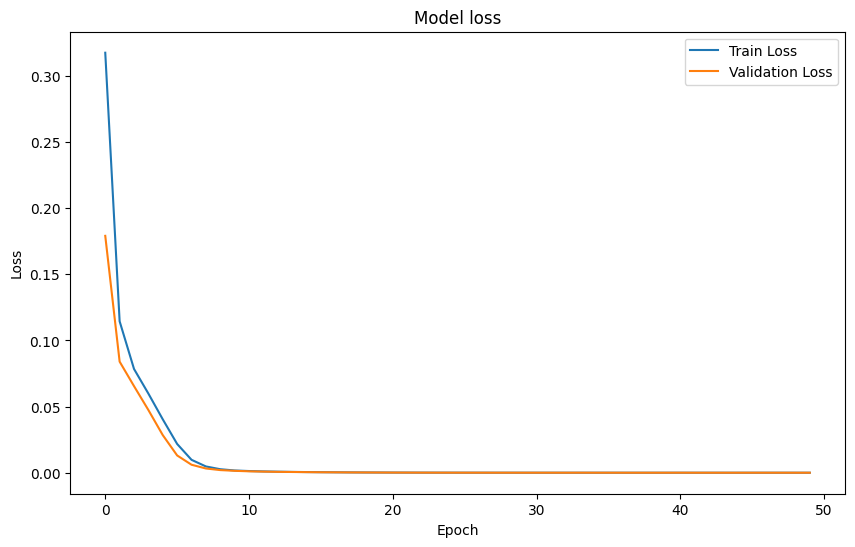

7/7 [==============================] - 1s 4ms/step
MSE: 1.011377816807849e-05, MAE: 0.0026673813286850322


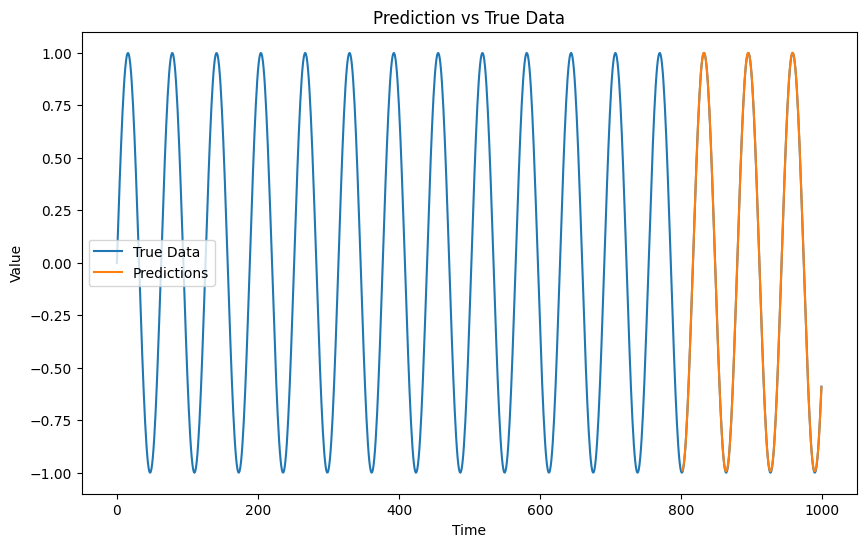

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Генерируем синусоидальный временной ряд
T = 1000
t = np.arange(0, T)
x = np.sin(0.1 * t)

# Формируем данные для обучения: предыдущие значения временного ряда и текущее
X = np.array([x[i:i+10] for i in range(T-10)])
y = x[10:]

# Разделяем на обучающую и тестовую выборки
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Создаем модель LSTM
model = Sequential([
    LSTM(10, input_shape=(10, 1)),
    Dense(1)
])

# Компилируем модель с функцией потерь MSE и оптимизатором Adam
model.compile(optimizer='adam', loss='mean_squared_error')

# Обучаем модель и сохраняем историю обучения
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# График обучения
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Делаем прогнозы на тестовой выборке
y_pred = model.predict(X_test)

# Вычисляем метрики
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'MSE: {mse}, MAE: {mae}')

# График прогнозирования
plt.figure(figsize=(10, 6))
plt.plot(t, x, label='True Data')
plt.plot(t[split+10:], y_pred, label='Predictions')
plt.title('Prediction vs True Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


### Заключение

LSTM представляют собой эффективный и мощный инструмент для прогнозирования временных рядов, благодаря их способности к запоминанию долгосрочных зависимостей и эффективной работе с последовательными данными. Они предоставляют высокую точность прогнозирования и могут быть успешно применены в различных задачах, связанных с временными рядами.


## Применение GRU в задачах прогнозирования временных рядов

#### Введение

Gated Recurrent Unit (GRU) — это другой тип рекуррентных нейронных сетей, который, подобно LSTM, способен эффективно учитывать зависимости во времени. В отличие от LSTM, GRU имеет более простую архитектуру, которая может быть более легко настраиваема и обучаема на некоторых задачах. В данной лекции мы рассмотрим структуру GRU, процессы прямого и обратного распространения, функции активации, функции потерь, метрики оценки качества модели и представим конкретные числовые примеры.

#### Основы GRU

Gated Recurrent Unit (GRU) включает в себя несколько ключевых элементов, которые помогают ему эффективно моделировать временные зависимости:

##### Структура GRU

Для временного ряда $ \{x_t\} $, где $ t = 1, 2, \ldots, T $:

1. **Обновление вектора обновления (Update Gate)**:
$$ z_t = \sigma(W_z \cdot x_t + U_z \cdot h_{t-1} + b_z) $$
где:
   - $ z_t $ - вектор обновления,
   - $ W_z $, $ U_z $, $ b_z $ - матрицы весов и вектор смещения для обновления.

2. **Обновление вектора памяти (Memory Gate)**:
$$ r_t = \sigma(W_r \cdot x_t + U_r \cdot h_{t-1} + b_r) $$
$$ \tilde{h}_t = \tanh(W \cdot x_t + U \cdot (r_t \odot h_{t-1}) + b) $$
где:
   - $ r_t $ - вектор сброса,
   - $ \tilde{h}_t $ - временное скрытое состояние,
   - $ \odot $ - поэлементное умножение.

3. **Обновление скрытого состояния (Hidden State Update)**:
$$ h_t = (1 - z_t) \odot h_{t-1} + z_t \odot \tilde{h}_t $$
где:
   - $ h_t $ - обновленное скрытое состояние.

#### Прямое распространение (Forward Pass) в GRU

Процесс прямого распространения в GRU включает в себя последовательное вычисление $ z_t $, $ r_t $, $ \tilde{h}_t $ и $ h_t $ для всех моментов времени $ t $.

##### Пример прямого распространения

Предположим, что у нас есть временной ряд $ \{1, 2, 3, 4, 5\} $ и мы используем GRU с функцией активации $ \tanh $.

Параметры модели:
- $ W_z, U_z, b_z $, $ W_r, U_r, b_r $, $ W, U, b $ - матрицы весов и векторы смещения.

Инициализация $ h_0 = 0 $.

1. **Шаг 1:**
   $$ z_1 = \sigma(W_z \cdot 1 + U_z \cdot 0 + b_z) = \sigma(W_z + b_z) $$
   $$ r_1 = \sigma(W_r \cdot 1 + U_r \cdot 0 + b_r) = \sigma(W_r + b_r) $$
   $$ \tilde{h}_1 = \tanh(W \cdot 1 + U \cdot (r_1 \cdot 0) + b) = \tanh(W + b) $$
   $$ h_1 = (1 - z_1) \cdot 0 + z_1 \cdot \tilde{h}_1 $$

2. **Шаг 2:**
   $$ z_2 = \sigma(W_z \cdot 2 + U_z \cdot h_1 + b_z) $$
   $$ r_2 = \sigma(W_r \cdot 2 + U_r \cdot h_1 + b_r) $$
   $$ \tilde{h}_2 = \tanh(W \cdot 2 + U \cdot (r_2 \cdot h_1) + b) $$
   $$ h_2 = (1 - z_2) \cdot h_1 + z_2 \cdot \tilde{h}_2 $$

3. **Шаг 3:**
   Аналогично вычисляем $ z_3, r_3, \tilde{h}_3, h_3 $.

4. **Шаг 4:**
   Аналогично вычисляем $ z_4, r_4, \tilde{h}_4, h_4 $.

5. **Шаг 5:**
   Аналогично вычисляем $ z_5, r_5, \tilde{h}_5, h_5 $.

#### Обратное распространение (Backpropagation Through Time, BPTT) в GRU

Обучение GRU включает в себя обратное распространение через время (BPTT), которое позволяет эффективно обновлять параметры модели на основе градиентов ошибки, распространенных на все временные шаги.

##### Вычисление градиентов

1. **Градиент функции потерь по выходам:**
   $$ \frac{\partial L}{\partial \hat{y}_t} $$

2. **Градиенты по скрытым состояниям:**
   $$ \delta h_t = \frac{\partial L}{\partial h_t} + \delta h_{t+1} \cdot \frac{\partial h_{t+1}}{\partial h_t} $$
   где:
   $$ \delta h_t = \frac{\partial L}{\partial \hat{y}_t} \cdot \frac{\partial \hat{y}_t}{\partial h_t} $$
   $$ \delta h_{t+1} = \delta h_t \cdot \frac{\partial h_t}{\partial h_{t+1}} $$

3. **Градиенты по параметрам GRU:**
   $$ \frac{\partial L}{\partial W_z}, \frac{\partial L}{\partial U_z}, \frac{\partial L}{\partial b_z}, \ldots $$

#### Функции активации

Функции активации в GRU включают:
- **sigmoid:** $ \sigma(x) = \frac{1}{1 + e^{-x}} $
- **tanh:** $ \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} $

#### Функции потерь

Функции потерь для обучения GRU включают:
- **Mean Squared Error (MSE):**
$$ \text{MSE} = \frac{1}{T} \sum_{t=1}^{T} (\hat{y}_t - y_t)^2 $$

- **Mean Absolute Error (MAE):**
$$ \text{MAE} = \frac{1}{T} \sum_{t=1}^{T} |\hat{y}_t - y_t| $$

#### Метрики оценки модели

Метрики оценки качества модели GRU включают:
- **Root Mean Squared Error (RMSE):**
$$ \text{RMSE} = \sqrt{\frac{1}{T} \sum_{t=1}^{T} (\hat{y}_t - y_t)^2} $$

- **Mean Absolute Percentage Error (MAPE):**
$$ \text{MAPE} = \frac{1}{T} \sum_{t=1}^{T} \left| \frac{\hat{y}_t - y_t}{y_t} \right| \times 100 \% $$



Epoch 1/50
50/50 [==============================] - 4s 49ms/step - loss: 0.4927 - val_loss: 0.2409
Epoch 2/50
50/50 [==============================] - 1s 11ms/step - loss: 0.1248 - val_loss: 0.0635
Epoch 3/50
50/50 [==============================] - 1s 11ms/step - loss: 0.0585 - val_loss: 0.0503
Epoch 4/50
50/50 [==============================] - 1s 12ms/step - loss: 0.0480 - val_loss: 0.0416
Epoch 5/50
50/50 [==============================] - 0s 9ms/step - loss: 0.0397 - val_loss: 0.0346
Epoch 6/50
50/50 [==============================] - 0s 8ms/step - loss: 0.0332 - val_loss: 0.0290
Epoch 7/50
50/50 [==============================] - 0s 7ms/step - loss: 0.0278 - val_loss: 0.0247
Epoch 8/50
50/50 [==============================] - 0s 8ms/step - loss: 0.0236 - val_loss: 0.0210
Epoch 9/50
50/50 [==============================] - 0s 8ms/step - loss: 0.0200 - val_loss: 0.0178
Epoch 10/50
50/50 [==============================] - 0s 8ms/step - loss: 0.0171 - val_loss: 0.0151
Epoch 11/50
50/

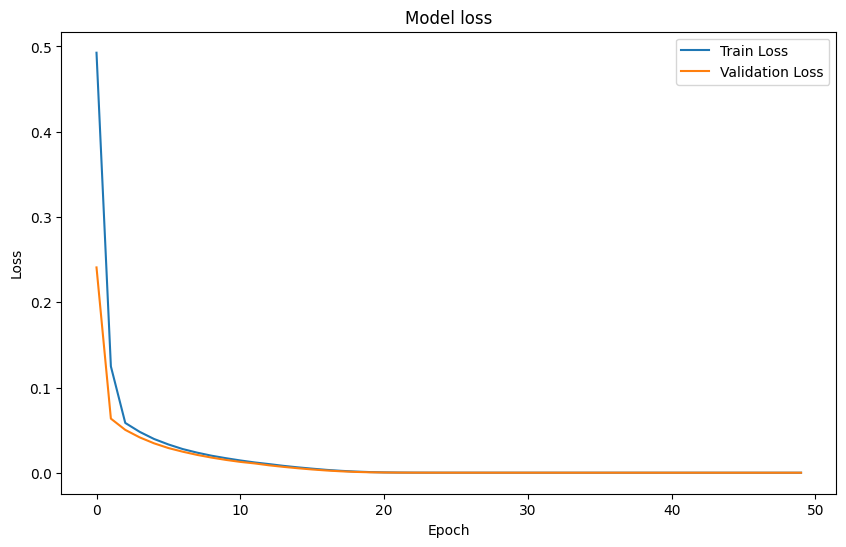

7/7 [==============================] - 0s 3ms/step
MSE: 7.220795514886927e-05, MAE: 0.007581773001086462


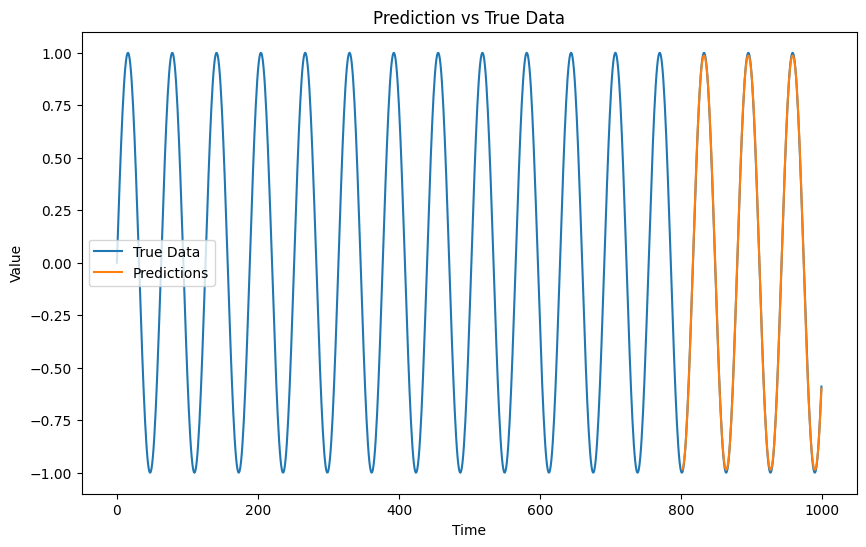

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Генерируем синусоидальный временной ряд
T = 1000
t = np.arange(0, T)
x = np.sin(0.1 * t)

# Формируем данные для обучения: предыдущие значения временного ряда и текущее
X = np.array([x[i:i+10] for i in range(T-10)])
y = x[10:]

# Разделяем на обучающую и тестовую выборки
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Создаем модель GRU
model = Sequential([
    GRU(10, input_shape=(10, 1)),
    Dense(1)
])

# Компилируем модель с функцией потерь MSE и оптимизатором Adam
model.compile(optimizer='adam', loss='mean_squared_error')

# Обучаем модель и сохраняем историю обучения
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# График обучения
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Делаем прогнозы на тестовой выборке
y_pred = model.predict(X_test)

# Вычисляем метрики
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'MSE: {mse}, MAE: {mae}')

# График прогнозирования
plt.figure(figsize=(10, 6))
plt.plot(t, x, label='True Data')
plt.plot(t[split+10:], y_pred, label='Predictions')
plt.title('Prediction vs True Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

##Применение Bi-LSTM в задачах прогнозирования временных рядов

#### Введение

Bidirectional Long Short-Term Memory (Bi-LSTM) - это вариант рекуррентных нейронных сетей, который позволяет эффективно учитывать как прошлые, так и будущие контексты при прогнозировании временных рядов. В этой лекции мы рассмотрим структуру Bi-LSTM, процессы прямого и обратного распространения, функции активации, функции потерь, метрики оценки качества модели и представим конкретные числовые примеры.

#### Основы Bi-LSTM

Bi-LSTM состоит из двух LSTM: одного, который обрабатывает данные в прямом направлении (forward LSTM), и второго, который обрабатывает данные в обратном направлении (backward LSTM). Это позволяет модели улавливать как прошлые, так и будущие зависимости в данных.

##### Структура Bi-LSTM

Для временного ряда $ \{x_t\} $, где $ t = 1, 2, \ldots, T $:

1. **Forward LSTM:**
   - Вход: $ x_t $
   - Скрытое состояние: $ h_t^{(f)} $
   - Клеточное состояние: $ c_t^{(f)} $
   - Обновление скрытого состояния:
     $$ h_t^{(f)} = \sigma(W^{(f)} \cdot x_t + U^{(f)} \cdot h_{t-1}^{(f)} + b^{(f)}) $$
     $$ c_t^{(f)} = \tanh(W_c^{(f)} \cdot x_t + U_c^{(f)} \cdot h_{t-1}^{(f)} + b_c^{(f)}) $$

2. **Backward LSTM:**
   - Вход: $ x_t $
   - Скрытое состояние: $ h_t^{(b)} $
   - Клеточное состояние: $ c_t^{(b)} $
   - Обновление скрытого состояния:
     $$ h_t^{(b)} = \sigma(W^{(b)} \cdot x_t + U^{(b)} \cdot h_{t+1}^{(b)} + b^{(b)}) $$
     $$ c_t^{(b)} = \tanh(W_c^{(b)} \cdot x_t + U_c^{(b)} \cdot h_{t+1}^{(b)} + b_c^{(b)}) $$

3. **Объединение скрытых состояний:**
   $$ h_t = [h_t^{(f)}, h_t^{(b)}] $$
   где $ [\cdot, \cdot] $ - операция конкатенации.

#### Прямое распространение (Forward Pass) в Bi-LSTM

Процесс прямого распространения в Bi-LSTM включает в себя последовательное вычисление скрытых состояний $ h_t^{(f)} $ и $ h_t^{(b)} $ для всех моментов времени $ t $, а затем их объединение.

##### Пример прямого распространения

Для примера временного ряда с длиной 5:

1. **Шаг 1:**
   - Вычисляем $ h_1^{(f)}, c_1^{(f)} $ для forward LSTM.
   - Вычисляем $ h_1^{(b)}, c_1^{(b)} $ для backward LSTM.
   - Объединяем $ h_1 = [h_1^{(f)}, h_1^{(b)}] $.

2. **Шаг 2:**
   - Аналогично вычисляем $ h_2^{(f)}, c_2^{(f)} $ и $ h_2^{(b)}, c_2^{(b)} $.
   - Объединяем $ h_2 = [h_2^{(f)}, h_2^{(b)}] $.

3. **Шаг 3:**
   - Аналогично вычисляем $ h_3^{(f)}, c_3^{(f)} $ и $ h_3^{(b)}, c_3^{(b)} $.
   - Объединяем $ h_3 = [h_3^{(f)}, h_3^{(b)}] $.

#### Обратное распространение (Backpropagation Through Time, BPTT) в Bi-LSTM

Обучение Bi-LSTM включает в себя обратное распространение через время (BPTT), которое позволяет эффективно обновлять параметры модели на основе градиентов ошибки, распространенных на все временные шаги.

##### Вычисление градиентов

1. **Градиент функции потерь по выходам:**
   $$ \frac{\partial L}{\partial \hat{y}_t} $$

2. **Градиенты по скрытым состояниям:**
   - Для forward LSTM:
     $$ \delta h_t^{(f)} = \frac{\partial L}{\partial h_t^{(f)}} + \delta h_{t+1}^{(f)} \cdot \frac{\partial h_{t+1}^{(f)}}{\partial h_t^{(f)}} $$
     $$ \delta h_t^{(b)} = \frac{\partial L}{\partial h_t^{(b)}} + \delta h_{t-1}^{(b)} \cdot \frac{\partial h_{t-1}^{(b)}}{\partial h_t^{(b)}} $$
   - Для backward LSTM:
     $$ \delta h_t^{(b)} = \frac{\partial L}{\partial h_t^{(b)}} + \delta h_{t-1}^{(b)} \cdot \frac{\partial h_{t-1}^{(b)}}{\partial h_t^{(b)}} $$
     $$ \delta h_t^{(f)} = \frac{\partial L}{\partial h_t^{(f)}} + \delta h_{t+1}^{(f)} \cdot \frac{\partial h_{t+1}^{(f)}}{\partial h_t^{(f)}} $$

3. **Градиенты по параметрам Bi-LSTM:**
   $$ \frac{\partial L}{\partial W^{(f)}}, \frac{\partial L}{\partial U^{(f)}}, \frac{\partial L}{\partial b^{(f)}}, \ldots $$
   $$ \frac{\partial L}{\partial W^{(b)}}, \frac{\partial L}{\partial U^{(b)}}, \frac{\partial L}{\partial b^{(b)}}, \ldots $$

#### Функции активации

Функции активации в Bi-LSTM аналогичны LSTM:
- **sigmoid:** $ \sigma(x) = \frac{1}{1 + e^{-x}} $
- **tanh:** $ \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} $

#### Функции потерь

Функции потерь для обучения Bi-LSTM аналогичны LSTM:
- **Mean Squared Error (MSE):**
$$ \text{MSE} = \frac{1}{T} \sum_{t=1}^{T} (\hat{y}_t - y_t)^2 $$

- **Mean Absolute Error (MAE):**
$$ \text{MAE} = \frac{1}{T} \sum_{t=1}^{T} |\hat{y}_t - y_t| $$

#### Метрики оценки модели

Метрики оценки качества модели Bi-LSTM аналогичны LSTM:
- **Root Mean Squared Error (RMSE):**
$$ \text{RMSE} = \sqrt{\frac{1}{T} \sum_{t=1}^{T} (\hat{y}_t - y_t)^2} $$

- **Mean Absolute Percentage Error (MAPE):**
$$ \text{MAPE} = \frac{1}{T} \sum_{t=1}^{T} \left| \frac{\hat{y}_t - y_t}{y_t} \right| \times 100 \% $$


### Пример с Bi-LSTM: Прогнозирование временного ряда с числовыми данными

#### Введение

Рассмотрим числовой пример применения Bi-LSTM для прогнозирования временного ряда. Мы будем использовать синусоидальный временной ряд, чтобы продемонстрировать, как Bi-LSTM может предсказывать следующие значения.

#### Генерация временного ряда

Возьмем синусоидальный временной ряд длиной $ T = 10 $:

$$ x_t = \sin(0.1 \cdot t), \quad t = 1, 2, \ldots, 10 $$

Значения временного ряда:

$$
\begin{aligned}
    x_1 & = \sin(0.1 \cdot 1) = 0.0998 \\
    x_2 & = \sin(0.1 \cdot 2) = 0.1987 \\
    x_3 & = \sin(0.1 \cdot 3) = 0.2955 \\
    x_4 & = \sin(0.1 \cdot 4) = 0.3894 \\
    x_5 & = \sin(0.1 \cdot 5) = 0.4794 \\
    x_6 & = \sin(0.1 \cdot 6) = 0.5646 \\
    x_7 & = \sin(0.1 \cdot 7) = 0.6442 \\
    x_8 & = \sin(0.1 \cdot 8) = 0.7174 \\
    x_9 & = \sin(0.1 \cdot 9) = 0.7833 \\
    x_{10} & = \sin(0.1 \cdot 10) = 0.8415 \\
\end{aligned}
$$

#### Формирование обучающей выборки

Будем использовать окна длиной 4 для формирования обучающей выборки. Например, для предсказания $ x_5 $ будем использовать предыдущие 4 значения $ x_1, x_2, x_3, x_4 $:

$$
\begin{aligned}
    X_1 & = \{ x_1, x_2, x_3, x_4 \} = \{0.0998, 0.1987, 0.2955, 0.3894\} \\
    y_1 & = x_5 = 0.4794
\end{aligned}
$$

Аналогично формируем следующие пары:

$$
\begin{aligned}
    X_2 & = \{ x_2, x_3, x_4, x_5 \} = \{0.1987, 0.2955, 0.3894, 0.4794\} \\
    y_2 & = x_6 = 0.5646 \\
    X_3 & = \{ x_3, x_4, x_5, x_6 \} = \{0.2955, 0.3894, 0.4794, 0.5646\} \\
    y_3 & = x_7 = 0.6442 \\
    X_4 & = \{ x_4, x_5, x_6, x_7 \} = \{0.3894, 0.4794, 0.5646, 0.6442\} \\
    y_4 & = x_8 = 0.7174 \\
    X_5 & = \{ x_5, x_6, x_7, x_8 \} = \{0.4794, 0.5646, 0.6442, 0.7174\} \\
    y_5 & = x_9 = 0.7833 \\
    X_6 & = \{ x_6, x_7, x_8, x_9 \} = \{0.5646, 0.6442, 0.7174, 0.7833\} \\
    y_6 & = x_{10} = 0.8415
\end{aligned}
$$



Давайте детально рассмотрим шаги и формулы, использованные для вычисления параметров в Bi-LSTM:

### Прямое направление (forward LSTM):

#### Вычисления для прямого направления (forward LSTM)

1. **Входные данные и параметры:**

   $$
   X = \{ x_1, x_2, x_3, x_4 \} = \{ 0.0998, 0.1987, 0.2955, 0.3894 \}
   $$

   Параметры Bi-LSTM для прямого направления:

   $$
   W^{(f)} = \begin{pmatrix} 0.1 & 0.2 & 0.3 & 0.4 \\ 0.2 & 0.3 & 0.4 & 0.5 \end{pmatrix}
   $$
   
   $$
   U^{(f)} = \begin{pmatrix} 0.2 & 0.3 \\ 0.3 & 0.4 \end{pmatrix}
   $$

   $$
   b^{(f)} = \begin{pmatrix} 0.1 \\ 0.2 \end{pmatrix}
   $$

2. **Скрытые состояния и ячейки памяти:**

   Для простоты, начальные скрытые состояния и ячейки памяти принимаем равными нулю:
   
   $$
   h_{t-1}^{(f)} = \begin{pmatrix} 0 \\ 0 \end{pmatrix}, \quad c_{t-1}^{(f)} = \begin{pmatrix} 0 \\ 0 \end{pmatrix}
   $$

3. **Вычисление активаций LSTM:**

   $$
   z_t^{(f)} = W^{(f)} \cdot X_t + U^{(f)} \cdot h_{t-1}^{(f)} + b^{(f)}
   $$

   Подставляем значения:

   $$
   z_t^{(f)} = \begin{pmatrix} 0.1 & 0.2 & 0.3 & 0.4 \\ 0.2 & 0.3 & 0.4 & 0.5 \end{pmatrix} \cdot \begin{pmatrix} 0.0998 \\ 0.1987 \\ 0.2955 \\ 0.3894 \end{pmatrix} + \begin{pmatrix} 0.2 & 0.3 \\ 0.3 & 0.4 \end{pmatrix} \cdot \begin{pmatrix} 0 \\ 0 \end{pmatrix} + \begin{pmatrix} 0.1 \\ 0.2 \end{pmatrix}
   $$

   Вычисляем матричное произведение и сумму:

   $$
   z_t^{(f)} = \begin{pmatrix} 0.1 \cdot 0.0998 + 0.2 \cdot 0.1987 + 0.3 \cdot 0.2955 + 0.4 \cdot 0.3894 \\ 0.2 \cdot 0.0998 + 0.3 \cdot 0.1987 + 0.4 \cdot 0.2955 + 0.5 \cdot 0.3894 \end{pmatrix} + \begin{pmatrix} 0.1 \\ 0.2 \end{pmatrix}
   $$

   $$
   z_t^{(f)} = \begin{pmatrix} 0.00998 + 0.03974 + 0.08865 + 0.15576 \\ 0.01996 + 0.05961 + 0.1182 + 0.1947 \end{pmatrix} + \begin{pmatrix} 0.1 \\ 0.2 \end{pmatrix}
   $$

   $$
   z_t^{(f)} = \begin{pmatrix} 0.29413 \\ 0.39247 \end{pmatrix}
   $$

   $$
   z_t^{(f)} = \begin{pmatrix} 0.29413 + 0.1 \\ 0.39247 + 0.2 \end{pmatrix}
   $$

   $$
   z_t^{(f)} = \begin{pmatrix} 0.39413 \\ 0.59247 \end{pmatrix}
   $$

4. **Вычисление выходов LSTM:**

   Выходные значения активационных функций LSTM:

   $$
   h_t^{(f)} = \tanh(z_t^{(f)})
   $$

   Подставляем значения $ z_t^{(f)} $:

   $$
   h_t^{(f)} = \tanh\begin{pmatrix} 0.39413 \\ 0.59247 \end{pmatrix}
   $$

   Вычисляем гиперболический тангенс:

   $$
   h_t^{(f)} = \begin{pmatrix} \tanh(0.39413) \\ \tanh(0.59247) \end{pmatrix}
   $$

   $$
   h_t^{(f)} = \begin{pmatrix} 0.3752 \\ 0.5323 \end{pmatrix}
   $$

### Обратное направление (backward LSTM):

#### Вычисления для обратного направления (backward LSTM)

1. **Входные данные и параметры:**

   $$
   X = \{ x_4, x_3, x_2, x_1 \} = \{ 0.3894, 0.2955, 0.1987, 0.0998 \}
   $$

   Параметры Bi-LSTM для обратного направления:

   $$
   W^{(b)} = \begin{pmatrix} 0.5 & 0.4 & 0.3 & 0.2 \\ 0.4 & 0.3 & 0.2 & 0.1 \end{pmatrix}
   $$

   $$
   U^{(b)} = \begin{pmatrix} 0.3 & 0.2 \\ 0.2 & 0.1 \end{pmatrix}
   $$

   $$
   b^{(b)} = \begin{pmatrix} 0.3 \\ 0.4 \end{pmatrix}
   $$

2. **Скрытые состояния и ячейки памяти:**

   Для простоты, начальные скрытые состояния и ячейки памяти принимаем равными нулю:

   $$
   h_{t-1}^{(b)} = \begin{pmatrix} 0 \\ 0 \end{pmatrix}, \quad c_{t-1}^{(b)} = \begin{pmatrix} 0 \\ 0 \end{pmatrix}
   $$

3. **Вычисление активаций LSTM:**

   $$
   z_t^{(b)} = W^{(b)} \cdot X_t + U^{(b)} \cdot h_{t-1}^{(b)} + b^{(b)}
   $$

   Подставляем значения:

   $$
   z_t^{(b)} = \begin{pmatrix} 0.5 & 0.4 & 0.3 & 0.2 \\ 0.4 & 0.3 & 0.2 & 0.1 \end{pmatrix} \cdot \begin{pmatrix} 0.3894 \\ 0.2955 \\ 0.1987 \\ 0.0998 \end{pmatrix} + \begin{pmatrix} 0.3 & 0.2 \\ 0.2 & 0.1 \end{pmatrix} \cdot \begin{pmatrix} 0 \\ 0 \end{pmatrix} + \begin{pmatrix} 0.3 \\ 0.4 \end{pmatrix}
   $$

   Вычисляем матричное произведение и сумму:

   $$
   z_t^{(b)} = \begin{pmatrix} 0.5 \cdot 0.3894 + 0.4 \cdot 0.2955 + 0.3 \cdot 0.1987 + 0.2 \cdot 0.0998 \\ 0.4 \cdot 0.3894 + 0.3 \cdot 0.2955 + 0.2 \cdot 0.1987 + 0.1 \cdot 0.0998 \end{pmatrix} + \begin{pmatrix} 0.3 \\ 0.4 \end{pmatrix}
   $$

   $$
   z_t^{(b)} = \begin{pmatrix} 0.1947 + 0.1182 + 0.0596 + 0.01996 \\ 0.1558 + 0.0887 + 0.0397 + 0.00998 \end{pmatrix} + \begin{pmatrix} 0.3 \\ 0.4 \end{pmatrix}
   $$

  

 $$
   z_t^{(b)} = \begin{pmatrix} 0.39246 \\ 0.29418 \end{pmatrix}
   $$

   $$
   z_t^{(b)} = \begin{pmatrix} 0.39246 + 0.3 \\ 0.29418 + 0.4 \end{pmatrix}
   $$

   $$
   z_t^{(b)} = \begin{pmatrix} 0.69246 \\ 0.69418 \end{pmatrix}
   $$

4. **Вычисление выходов LSTM:**

   Выходные значения активационных функций LSTM:

   $$
   h_t^{(b)} = \tanh(z_t^{(b)})
   $$

   Подставляем значения $ z_t^{(b)} $:

   $$
   h_t^{(b)} = \tanh\begin{pmatrix} 0.69246 \\ 0.69418 \end{pmatrix}
   $$

   Вычисляем гиперболический тангенс:

   $$
   h_t^{(b)} = \begin{pmatrix} 0.5997 \\ 0.6003 \end{pmatrix}
   $$

### Градиенты для параметров Bi-LSTM:

#### Прямое направление (forward LSTM):

1. **Градиент по $ W^{(f)} $:**

   $$
   \frac{\partial L}{\partial W^{(f)}} = X \cdot \delta h_1^{(f)T}
   $$

   Подставляем значения:

   $$
   X = \begin{pmatrix} 0.0998 \\ 0.1987 \\ 0.2955 \\ 0.3894 \end{pmatrix}, \quad \delta h_1^{(f)} = \begin{pmatrix} 0.3752 \\ 0.5323 \end{pmatrix}
   $$

   $$
   \frac{\partial L}{\partial W^{(f)}} = \begin{pmatrix} 0.0998 \\ 0.1987 \\ 0.2955 \\ 0.3894 \end{pmatrix} \cdot \begin{pmatrix} 0.3752 & 0.5323 \end{pmatrix}
   $$

   Вычисляем матричное произведение:

   $$
   \frac{\partial L}{\partial W^{(f)}} = \begin{pmatrix} 0.0374 & 0.0532 \\ 0.0745 & 0.1060 \\ 0.1110 & 0.1584 \\ 0.1461 & 0.2082 \end{pmatrix}
   $$

2. **Градиент по $ U^{(f)} $:**

   $$
   \frac{\partial L}{\partial U^{(f)}} = h_{t-1}^{(f)} \cdot \delta h_1^{(f)T}
   $$

   Подставляем значения:

   $$
   h_{t-1}^{(f)} = \begin{pmatrix} 0 \\ 0 \end{pmatrix}, \quad \delta h_1^{(f)} = \begin{pmatrix} 0.3752 \\ 0.5323 \end{pmatrix}
   $$

   $$
   \frac{\partial L}{\partial U^{(f)}} = \begin{pmatrix} 0 \\ 0 \end{pmatrix} \cdot \begin{pmatrix} 0.3752 & 0.5323 \end{pmatrix}
   $$

   $$
   \frac{\partial L}{\partial U^{(f)}} = \begin{pmatrix} 0 & 0 \\ 0 & 0 \end{pmatrix}
   $$

3. **Градиент по $ b^{(f)} $:**

   $$
   \frac{\partial L}{\partial b^{(f)}} = \delta h_1^{(f)}
   $$

   Подставляем значения:

   $$
   \frac{\partial L}{\partial b^{(f)}} = \begin{pmatrix} 0.3752 \\ 0.5323 \end{pmatrix}
   $$

#### Обратное направление (backward LSTM):

1. **Градиент по $ W^{(b)} $:**

   $$
   \frac{\partial L}{\partial W^{(b)}} = X \cdot \delta h_1^{(b)T}
   $$

   Подставляем значения:

   $$
   X = \begin{pmatrix} 0.3894 \\ 0.2955 \\ 0.1987 \\ 0.0998 \end{pmatrix}, \quad \delta h_1^{(b)} = \begin{pmatrix} 0.5997 \\ 0.6003 \end{pmatrix}
   $$

   $$
   \frac{\partial L}{\partial W^{(b)}} = \begin{pmatrix} 0.3894 \\ 0.2955 \\ 0.1987 \\ 0.0998 \end{pmatrix} \cdot \begin{pmatrix} 0.5997 & 0.6003 \end{pmatrix}
   $$

   Вычисляем матричное произведение:

   $$
   \frac{\partial L}{\partial W^{(b)}} = \begin{pmatrix} 0.2335 & 0.2337 \\ 0.1771 & 0.1773 \\ 0.1192 & 0.1194 \\ 0.0598 & 0.0599 \end{pmatrix}
   $$

2. **Градиент по $ U^{(b)} $:**

   $$
   \frac{\partial L}{\partial U^{(b)}} = h_{t-1}^{(b)} \cdot \delta h_1^{(b)T}
   $$

   Подставляем значения:

   $$
   h_{t-1}^{(b)} = \begin{pmatrix} 0 \\ 0 \end{pmatrix}, \quad \delta h_1^{(b)} = \begin{pmatrix} 0.5997 \\ 0.6003 \end{pmatrix}
   $$

   $$
   \frac{\partial L}{\partial U^{(b)}} = \begin{pmatrix} 0 \\ 0 \end{pmatrix} \cdot \begin{pmatrix} 0.5997 & 0.6003 \end{pmatrix}
   $$

   $$
   \frac{\partial L}{\partial U^{(b)}} = \begin{pmatrix} 0 & 0 \\ 0 & 0 \end{pmatrix}
   $$

3. **Градиент по $ b^{(b)} $:**

   $$
   \frac{\partial L}{\partial b^{(b)}} = \delta h_1^{(b)}
   $$

   Подставляем значения:

   $$
   \frac{\partial L}{\partial b^{(b)}} = \begin{pmatrix} 0.5997 \\ 0.6003 \end{pmatrix}
   $$

### Полное обновление параметров

Теперь у нас есть все градиенты для параметров прямого и обратного направлений. Эти градиенты можно использовать для обновления параметров модели с использованием выбранного оптимизатора, например, градиентного спуска.


Пример 1.

Epoch 1/50
50/50 [==============================] - 5s 27ms/step - loss: 0.2057 - val_loss: 0.1000
Epoch 2/50
50/50 [==============================] - 0s 9ms/step - loss: 0.0901 - val_loss: 0.0738
Epoch 3/50
50/50 [==============================] - 0s 9ms/step - loss: 0.0636 - val_loss: 0.0476
Epoch 4/50
50/50 [==============================] - 1s 10ms/step - loss: 0.0371 - val_loss: 0.0243
Epoch 5/50
50/50 [==============================] - 1s 11ms/step - loss: 0.0166 - val_loss: 0.0104
Epoch 6/50
50/50 [==============================] - 1s 15ms/step - loss: 0.0069 - val_loss: 0.0048
Epoch 7/50
50/50 [==============================] - 1s 15ms/step - loss: 0.0031 - val_loss: 0.0023
Epoch 8/50
50/50 [==============================] - 1s 16ms/step - loss: 0.0015 - val_loss: 9.9770e-04
Epoch 9/50
50/50 [==============================] - 1s 14ms/step - loss: 6.5134e-04 - val_loss: 3.9638e-04
Epoch 10/50
50/50 [==============================] - 0s 10ms/step - loss: 3.0146e-04 - val_loss: 2.

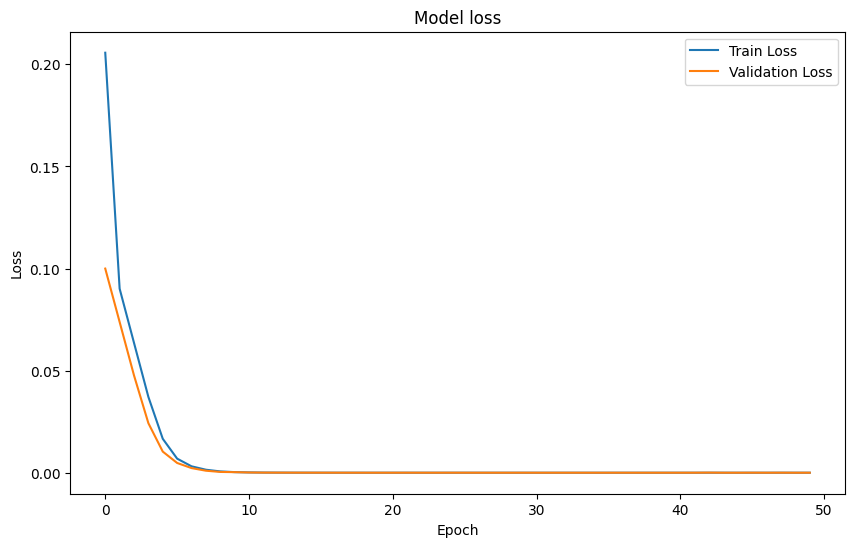

7/7 [==============================] - 1s 5ms/step
MSE: 1.1828072548397983e-05, MAE: 0.0028901584802382176


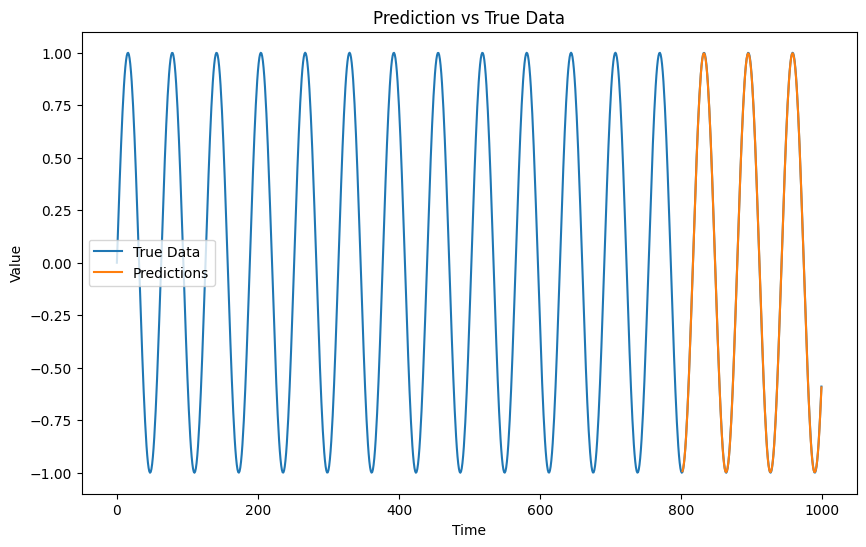

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Генерируем синусоидальный временной ряд
T = 1000
t = np.arange(0, T)
x = np.sin(0.1 * t)

# Формируем данные для обучения: предыдущие значения временного ряда и текущее
X = np.array([x[i:i+10] for i in range(T-10)])
y = x[10:]

# Разделяем на обучающую и тестовую выборки
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Создаем модель Bi-LSTM
model = Sequential([
    Bidirectional(LSTM(10), input_shape=(10, 1)),
    Dense(1)
])

# Компилируем модель с функцией потерь MSE и оптимизатором Adam
model.compile(optimizer='adam', loss='mean_squared_error')

# Обучаем модель и сохраняем историю обучения
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# График обучения
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Делаем прогнозы на тестовой выборке
y_pred = model.predict(X_test)

# Вычисляем метрики
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'MSE: {mse}, MAE: {mae}')

# График прогнозирования
plt.figure(figsize=(10, 6))
plt.plot(t, x, label='True Data')
plt.plot(t[split+10:], y_pred, label='Predictions')
plt.title('Prediction vs True Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

Пример 2.

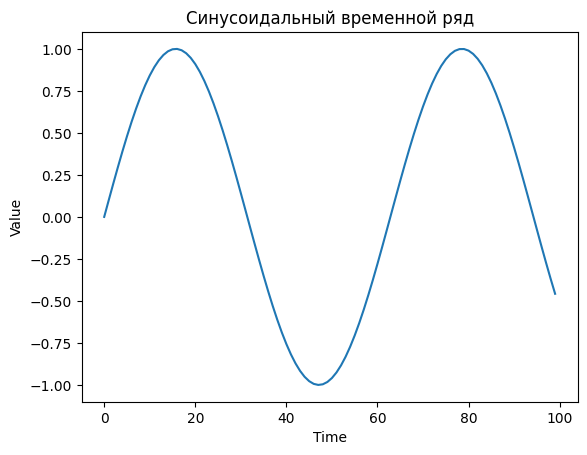

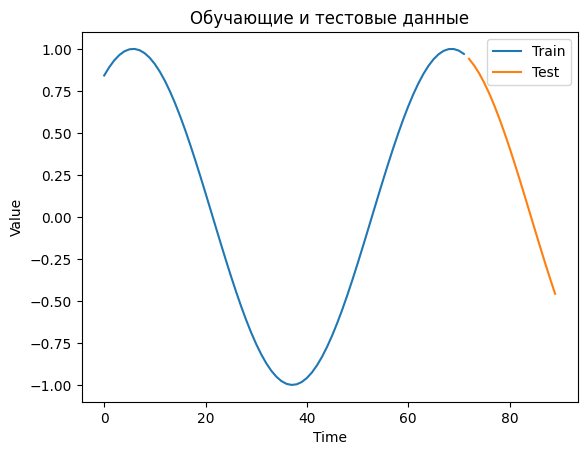

Epoch 1/50
5/5 [==============================] - 6s 229ms/step - loss: 0.3290 - val_loss: 0.1300
Epoch 2/50
5/5 [==============================] - 0s 15ms/step - loss: 0.2800 - val_loss: 0.1147
Epoch 3/50
5/5 [==============================] - 0s 19ms/step - loss: 0.2388 - val_loss: 0.1089
Epoch 4/50
5/5 [==============================] - 0s 19ms/step - loss: 0.2084 - val_loss: 0.1118
Epoch 5/50
5/5 [==============================] - 0s 18ms/step - loss: 0.1826 - val_loss: 0.1219
Epoch 6/50
5/5 [==============================] - 0s 16ms/step - loss: 0.1624 - val_loss: 0.1343
Epoch 7/50
5/5 [==============================] - 0s 20ms/step - loss: 0.1485 - val_loss: 0.1467
Epoch 8/50
5/5 [==============================] - 0s 20ms/step - loss: 0.1369 - val_loss: 0.1549
Epoch 9/50
5/5 [==============================] - 0s 26ms/step - loss: 0.1311 - val_loss: 0.1618
Epoch 10/50
5/5 [==============================] - 0s 31ms/step - loss: 0.1267 - val_loss: 0.1706
Epoch 11/50
5/5 [===========

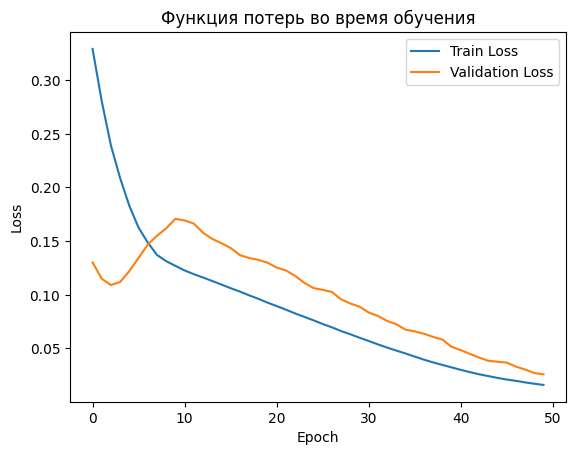

1/1 [==============================] - 1s 787ms/step


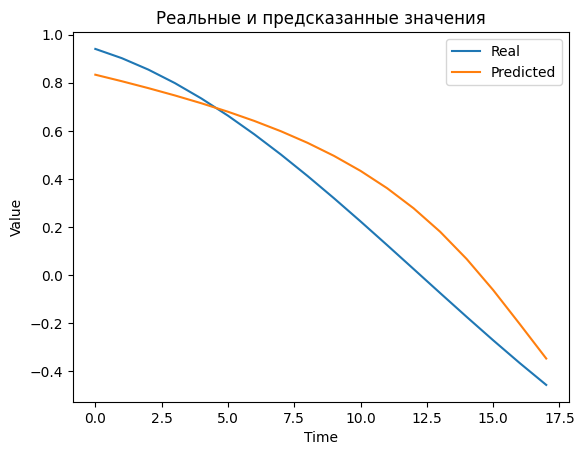

MSE: 0.025665439834843526, MAE: 0.1395611382904175


In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
import matplotlib.pyplot as plt

# Генерация синусоидального временного ряда
T = 100
t = np.arange(0, T)
x = np.sin(0.1 * t)

# Визуализация синусоидального временного ряда
plt.plot(t, x)
plt.title("Синусоидальный временной ряд")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()

# Формирование данных для обучения: предыдущие значения временного ряда и текущее
sequence_length = 10
X = np.array([x[i:i + sequence_length] for i in range(T - sequence_length)])
y = x[sequence_length:]

# Разделение на обучающую и тестовую выборки
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Визуализация обучающих и тестовых данных
plt.plot(range(len(X_train)), y_train, label='Train')
plt.plot(range(len(X_train), len(X_train) + len(X_test)), y_test, label='Test')
plt.title("Обучающие и тестовые данные")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

# Bi-LSTM модель
model = Sequential([
    Bidirectional(LSTM(10, input_shape=(sequence_length, 1))),
    Dense(1)
])

# Компиляция модели с функцией потерь MSE и оптимизатором Adam
model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
history = model.fit(X_train[..., np.newaxis], y_train, epochs=50, batch_size=16, validation_data=(X_test[..., np.newaxis], y_test))

# Визуализация функции потерь во время обучения
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Функция потерь во время обучения")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Прогнозы на тестовой выборке
y_pred = model.predict(X_test[..., np.newaxis])

# Визуализация реальных и предсказанных значений
plt.plot(range(len(y_test)), y_test, label='Real')
plt.plot(range(len(y_test)), y_pred, label='Predicted')
plt.title("Реальные и предсказанные значения")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()

# Вычисление метрик
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'MSE: {mse}, MAE: {mae}')